# ------------------- Apresentação de análise exploratória --------------------------------

#### Alunos: 
- Hugo Cezar 
- Tainah Guerra 
- Otávio Santos
- Daniel 

## Analise Exploratória


### A escolha do dataset

O dataset escolhido para a realização desta análise está contido neste [link](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce). Este dataset contém informações sobre compras realizadas virtualmente em território brasileiro realizadas entre os anos de 2016 à 2018. 


### Inicialização da análise

Para iniciarmos a análise, primeiro, importaremos para o ambiente deste caderno, todos as bibliotecas necessárias utilizando a função *import*.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import stopwords
from wordcloud import WordCloud 

### Importação dos datasets

Foram importados os datasets utilizando a função do pandas chamada *read_csv*. Todos os datasets, estavam no repositório remoto disponivel neste [link](https://github.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander).

In [66]:
path_customer = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_customers_dataset.csv"
path_geolocation = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_geolocation_dataset.csv"
path_order_items = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_items_dataset.csv"
path_order_payments = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_payments_dataset.csv"
path_order_reviews = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_order_reviews_dataset.csv"
path_order = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_orders_dataset.csv"
path_products = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_products_dataset.csv"
path_sellers = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/olist_sellers_dataset.csv"
path_translation = "https://raw.githubusercontent.com/OtavioSotnas/AnaliseExploratoria-ADA-Santander/main/base%20de%20dados/product_category_name_translation.csv"

### Análise das compras realizadas

Importando o dataset referente as compras, fazendo uma análise inicial, temos as seguintes colunas para análise.

In [67]:
order = pd.read_csv(path_order)
order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Utilizaremos em todos os dataset, uma análise inicial com os métodos *info* e *shape* para entenderemos inicialmente, com quais variáveis estamos trabalhando.

In [68]:
print('Informações básicas', order.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', order.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (99441, 8)


Foi realizada a verificação para detectar valores nulos ou NaN dentro do dataset.

In [69]:
order_null = order.isnull().sum()
print(order_null)

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


Temos dados faltantes nas colunas referentes às datas de aprovação do pagamento, de postagem do produto e de entrega ao cliente. Essa ausência pode estar relacionada ao status do pedido, uma vez que pedidos ainda não finalizados ou cancelados podem não ter essas informações. Para testar essa hipótese, foi filtrada as colunas que existiam valores nulos e verificado qual seu status.

In [70]:
# Checando valores percentuais de nulos para cada status de pedido

statuses = order['order_status'].unique()
cols_null = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

print('Porcentagem de dados nulos para cada status:')
print('-' * 50)

for column in cols_null: 
    print(f'{column}\n')
    col_null = order[column].isnull().sum()  
    for status in statuses:
        status_null = order.loc[order['order_status'] == status, column].isnull().sum()  
        percentage = (status_null / col_null) * 100 
        print(f'{status}: {percentage:.1f}%')
    print('-' * 50)

Porcentagem de dados nulos para cada status:
--------------------------------------------------
order_approved_at

delivered: 8.8%
invoiced: 0.0%
shipped: 0.0%
processing: 0.0%
unavailable: 0.0%
canceled: 88.1%
created: 3.1%
approved: 0.0%
--------------------------------------------------
order_delivered_carrier_date

delivered: 0.1%
invoiced: 17.6%
shipped: 0.0%
processing: 16.9%
unavailable: 34.2%
canceled: 30.8%
created: 0.3%
approved: 0.1%
--------------------------------------------------
order_delivered_customer_date

delivered: 0.3%
invoiced: 10.6%
shipped: 37.3%
processing: 10.2%
unavailable: 20.5%
canceled: 20.9%
created: 0.2%
approved: 0.1%
--------------------------------------------------


Analisando mais proximamente a distribuição de valores nulos de acordo com o status do pedido para cada coluna, vemos que, de fato, parece haver relação entre os dados faltantes e o status do pedido:

- `order_approved_at` (data de aprovação do pagamento): maior parte dos dados NaN foram referentes a pedidos cancelados (~88.1%);
- `order_delivered_carrier_date` (data de postagem do produto): maior parte dos dados NaN foram referentes a pedidos indisponíveis e cancelados (~65%), respectivamente;
- `order_delivered_customer_date` (data de entrega ao cliente): maior parte dos dados NaN foram referentes a pedidos enviados, cancelados e indisponíveis (~78.7%), respectivamente.

Pedidos entregues representaram menos de 0.3% de dados nulos em quase todas colunas, com exceção à "order_approved_at". Os dados faltantes nesse status levantam maiores questionamentos, uma vez que esses passaram por todos estágios de compra e transporte e deveriam conter todas informações. Sendo assim, analiseremos então, os pedidos entregues, os quais apresentam a maior quantidade de valores não nulos. Começaremos analisando o dataset referente a avaliação dos produtos comprados.

### Análise das avaliações das compras

In [71]:
order_review = pd.read_csv(path_order_reviews)
print('Informações básicas', order_review.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', order_review.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (99224, 7)


In [72]:
order_review.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Como estamos tratando de avaliações dos produtos, é necessário categorizar as notas recebidas para entendermos se os clientes estão satisfeitos ou não com os produtos entregues.

In [73]:
print(f'As notas de avaliação possíveis dos pedidos são: {sorted(order_review["review_score"].unique())}')
print('\nA distribuição de pedidos de acordo com nota de avaliação é: \n',
order_review['review_score'].value_counts().sort_index(ascending=False), '\n')
print('Percentualmente, as notas se distribuiem: \n ',)
print(order_review['review_score'].value_counts(True).sort_index(ascending=False)*100)

As notas de avaliação possíveis dos pedidos são: [1, 2, 3, 4, 5]

A distribuição de pedidos de acordo com nota de avaliação é: 
 review_score
5    57328
4    19142
3     8179
2     3151
1    11424
Name: count, dtype: int64 

Percentualmente, as notas se distribuiem: 
 
review_score
5    57.776344
4    19.291704
3     8.242965
2     3.175643
1    11.513344
Name: proportion, dtype: float64


A contagem de nulos referem a este dataset é apresentada no bloco abaixo.

In [74]:
order_review.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Temos dados faltantes nas colunas referentes ao título do comentário e mensagem do comentário, que quase sempre são opcionais, o que pode explicar sua ausência em algumas das avaliações de produtos.

In [75]:
order_review.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Os valores encontrados acima indicam uma boa avaliação geral dos produtos, como evidenciado por:
- Média elevada de aproximadamente 4.09;
- 25% das notas, como evidenciado ao analisar o primeiro quartil, são iguais ou menores que 4;
- Mediana de 5, indicando que pelo menos metade das notas são iguais a 5.

Entretando, o desvio padrão de ~1.35 revela uma variação razoável entre as opiniões dos clientes sobre os produtos.

O Gráfico da distribuição das notas está apresenta na célula abaixo.

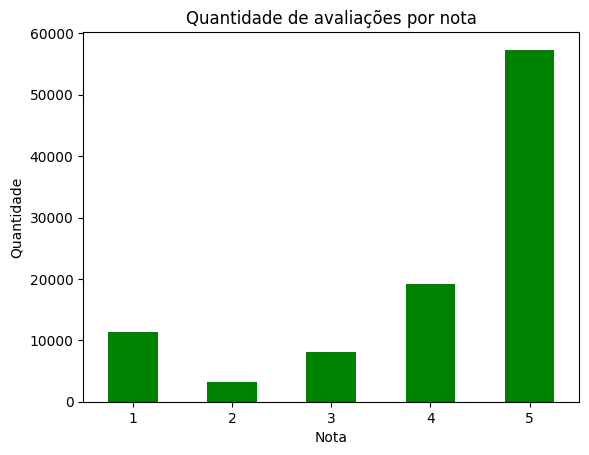

In [76]:
score_count = order_review['review_score'].value_counts().sort_index()

score_count.plot(kind='bar', xlabel='Nota', ylabel='Quantidade', title='Quantidade de avaliações por nota', color='green', rot=0)

plt.show()

### Análise do pagamento dos pedidos

Vamos analisar o dataser referente ao pagamento dos pedidos.

In [77]:
order_payments = pd.read_csv(path_order_payments)

In [78]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [79]:
print('Informações básicas', order_payments.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', order_payments.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (103886, 5)


In [80]:
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

A base de dados é constituída por 5 características e 103.886 registros e não há dados faltantes em qualquer característica.

In [81]:
order_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


A quantidade total de compras com identificadores únicos (99.440) é menor que a quantidade de registros na base de cálculo (103.886), o que demonstra que uma compra pode ter vários pagamentos.

In [82]:
order_payments['order_id'].value_counts().head(15)

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
ee9ca989fc93ba09a6eddc250ce01742    19
4bfcba9e084f46c8e3cb49b0fa6e6159    15
21577126c19bf11a0b91592e5844ba78    15
3c58bffb70dcf45f12bdf66a3c215905    14
4689b1816de42507a7d63a4617383c59    14
4fb76fa13b108a0d0478483421b0992c    13
cf101c3abd3c061ca9f78c1bbb1125af    13
73df5d6adbeea12c8ae03df93f346e86    13
c6492b842ac190db807c15aff21a7dd6    12
67d83bd36ec2c7fb557742fb58837659    12
Name: count, dtype: int64

Cada pagamento de uma compra é identificado por um número sequencial (payment_sequantial) iniciado em 1.

Por exemplo, a compra identificada pelo id ccf804e764ed5650cd8759557269dc13 teve com 26 pagamentos, sendo 1 pagamento com cartão de crédito e os demais com voucher.

In [83]:
order_payments[order_payments['order_id'] == 'ccf804e764ed5650cd8759557269dc13']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4346,ccf804e764ed5650cd8759557269dc13,19,voucher,1,1.68
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
16279,ccf804e764ed5650cd8759557269dc13,14,voucher,1,0.97
18876,ccf804e764ed5650cd8759557269dc13,15,voucher,1,1.11
21447,ccf804e764ed5650cd8759557269dc13,6,voucher,1,2.26
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
40369,ccf804e764ed5650cd8759557269dc13,5,voucher,1,2.69
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15


Uma compra também pode ser parcelada, a coluna "payment_installments" indica a quantidade de parcelas.

Quanto aos valores dos pagamentos, consolidamos o total por compra (order_id) e verificamos as principais medidas estatísticas.

In [84]:
order_total_value = order_payments.groupby('order_id').sum(numeric_only=True)
order_total_value['payment_value'].sort_values(ascending=False)

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
                                      ...   
e8bbc1d69fee39eee4c72cb5c969e39d       10.07
f1d5c2e6867fa93ceee9ef9b34a53cbf        9.59
c8c528189310eaa44a745b8d9d26908b        0.00
00b1cb0320190ca0daa2c88b35206009        0.00
4637ca194b6387e2d538dc89b124b0ee        0.00
Name: payment_value, Length: 99440, dtype: float64

In [85]:
order_total_value['payment_value'].describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

O valor médio de pagamento é $160.99, com desvio padrão de $221.95, o que permite concluir que há valores esparços. De fato, o maior pagamento é de $13664.08, embora 75\% deles não superem $176.97.

### Análise dos produtos

A ánalise do dataset dos produtos será apresentada a seguir.

In [86]:
products = pd.read_csv(path_products)
print('Informações básicas', products.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', products.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (32951, 9)


In [87]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


A base de dados possui 32951 registros e 9 características, sendo:
- 1 para identificação (product_id),
- 1 categórica (product_category_name),
- 3 quantitativas sobre a descrição de cada produto (product_name_lenght, product_description_lenght,product_photos_qty), e
- 4 quantitativas sobre peso e dimensões dos produtos (product_weight_g, product_length_cm, product_height_cm, product_width_cm)

Há produtos com valores ausentes nas seguintes colunas:

In [88]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Dados estatísticos das características numéricas:

In [89]:
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


### Análise dos consumidores

Analisando o Dataset dos consumidores, temos:

In [90]:
customer = pd.read_csv(path_customer)
print('Informações básicas', customer.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', customer.shape)

print("Há valores nulos :", customer.isnull().any().any())
print("Há valores NaN :", customer.isna().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (99441, 5)
Há valores nulos : False
Há valores NaN : False


In [91]:
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Analisando o dataset, analisamos a distribuição de consumidores por estado e as suas medidas estatisticas:

In [92]:
states_customers = customer['customer_state'].value_counts()
print('\nA distribuição de consumidores de acordo os estados: \n',
customer['customer_state'].value_counts().head(10), '\n')
print('Percentualmente, os consumidores se distribuiem: \n ',)
print(customer['customer_state'].value_counts(True).head(10)*100)

print('\n \n ', '-*-' *25, '\n \n')

print(states_customers.describe())


A distribuição de consumidores de acordo os estados: 
 customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64 

Percentualmente, os consumidores se distribuiem: 
 
customer_state
SP    41.980672
RJ    12.924247
MG    11.700405
RS     5.496727
PR     5.073360
SC     3.657445
BA     3.399000
DF     2.152030
ES     2.044428
GO     2.031355
Name: proportion, dtype: float64

 
  -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 
 

count       27.000000
mean      3683.000000
std       8270.437664
min         46.000000
25%        381.500000
50%        907.000000
75%       2760.000000
max      41746.000000
Name: count, dtype: float64


Observa-se que há uma grande dispersão de compras entre os estados, visto que a diferença de consumidores entre o estado com maior número (41746) e o de menor número(46) é de grande magnitude. Isso explica o desvio padrão elevado.

In [93]:
city_customers = customer['customer_city'].value_counts()
print('\nA distribuição de consumidores de acordo as cidades: \n',
customer['customer_city'].value_counts().head(10), '\n')
print('Percentualmente, os vendedores se distribuiem: \n ',)
print(customer['customer_city'].value_counts(True).head(10)*100)

print('\n \n ', '-*-' *25, '\n \n')

print(city_customers.describe())


A distribuição de consumidores de acordo as cidades: 
 customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64 

Percentualmente, os vendedores se distribuiem: 
 
customer_city
sao paulo                15.627357
rio de janeiro            6.920687
belo horizonte            2.788588
brasilia                  2.142979
curitiba                  1.529550
campinas                  1.452117
porto alegre              1.386752
salvador                  1.251999
guarulhos                 1.195684
sao bernardo do campo     0.943273
Name: proportion, dtype: float64

 
  -*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 
 

count     4119.000000
mean        24.142025
std        279.2

Um comportamento similiar ao dos estados é encontrado ao analisarmos as cidades, vendo que 75% das cidades não tem um número de consumidores maior que 9. Porém, a cidade que mais tem consumidores tem 15540.



### Análise dos vendedores

Analisando o dataset dos vendedores, temos que:

In [94]:
sellers = pd.read_csv(path_sellers)
print('Informações básicas', sellers.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', sellers.shape)

print("Há valores nulos :", sellers.isnull().any().any())
print("Há valores NaN :", sellers.isna().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (3095, 4)
Há valores nulos : False
Há valores NaN : False


In [95]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Analisando a proporção de vendedores por estado temos que:

In [96]:
print('\nA distribuição de vendedores de acordo os estados: \n',
sellers['seller_state'].value_counts().head(10).sort_values(ascending=False), '\n')
print('Percentualmente, os vendedores se distribuiem: \n ',)
print(sellers['seller_state'].value_counts(True).head(10).sort_values(ascending=False)*100)



A distribuição de vendedores de acordo os estados: 
 seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
Name: count, dtype: int64 

Percentualmente, os vendedores se distribuiem: 
 
seller_state
SP    59.741519
PR    11.276252
MG     7.883683
SC     6.138934
RJ     5.525040
RS     4.168013
GO     1.292407
DF     0.969305
ES     0.743134
BA     0.613893
Name: proportion, dtype: float64


### Análise dos produtos dos pedidos


In [97]:
order_items = pd.read_csv(path_order_items)
print('Informações básicas', order_items.info(), '\n')
print('-*-'*20, '\n')
print('Formato do dataset: ', order_items.shape)

print("Há valores nulos :", order_items.isnull().any().any())
print("Há valores NaN :", order_items.isna().any().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Informações básicas None 

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*- 

Formato do dataset:  (112650, 7)
Há valores nulos : False
Há valores NaN : False


In [98]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Para analisar os produtos mais vendidos, os produtos foram agrupados de acordo com a sua categoria, e posteriormente, calculada a quantidade de venda feita nessa categoria.

A categoria dos 10 mais vendidos é: 
 product_category_name
cama_mesa_banho           11115
beleza_saude               9670
esporte_lazer              8641
moveis_decoracao           8334
informatica_acessorios     7827
utilidades_domesticas      6964
relogios_presentes         5991
telefonia                  4545
ferramentas_jardim         4347
automotivo                 4235
Name: count, dtype: int64


<Axes: title={'center': 'Categorias mais vendidas'}, xlabel='Categorias', ylabel='Vendas'>

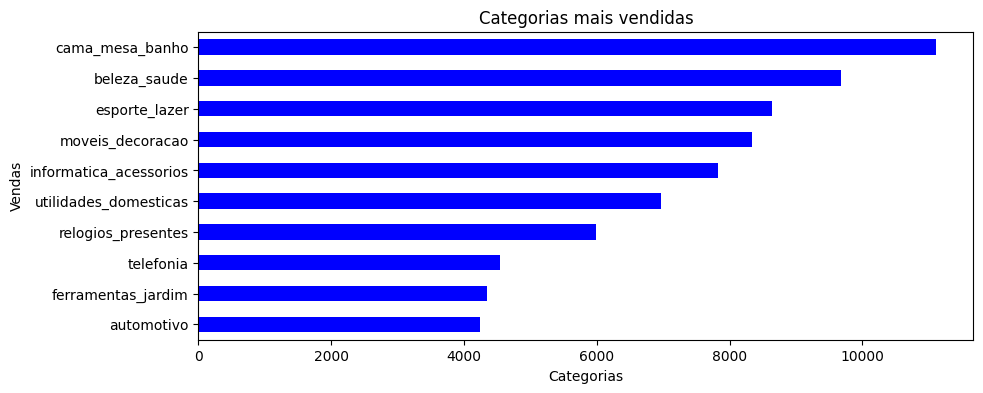

In [99]:
dataframe_merged = pd.merge(order_items, products[['product_id', 'product_category_name']], on='product_id')
print('A categoria dos 10 mais vendidos é: \n',
      dataframe_merged.value_counts('product_category_name').head(10))

best_seller_products = dataframe_merged.value_counts('product_category_name')
best_seller_products.head(10).sort_values(ascending=True).plot(kind='barh',
                          figsize=(10,4),
                          xlabel='Categorias',
                          ylabel='Vendas',
                          color='Blue',
                          title='Categorias mais vendidas' )

## Perguntas

### **1 - Quais os tipos de pagamento mais utilizados? E para os valores mais altos, a proporção se mantém?**


Os tipos de pagamentos são os seguintes:


In [100]:
order_payments['payment_type'].value_counts()


payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Os pagamentos são feitos majoritariamente por cartão de crédito, o que representa quase 74% do total.

In [101]:
order_payments['payment_type'].value_counts(True)*100

payment_type
credit_card    73.922376
boleto         19.043952
voucher         5.558978
debit_card      1.471806
not_defined     0.002888
Name: proportion, dtype: float64

Plotando o gráfico das distribuições dos pagamentos, vemos que a maioria das compras tiveram valores igual ou menores do que $1000. 

(-20.0, 3000.0)

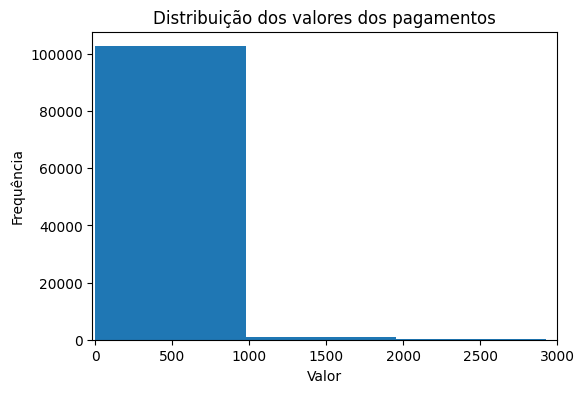

In [102]:
grafic_order_payments = order_payments['payment_value'].plot(
    kind='hist',
    figsize=(6,4),
    xlabel='Valor',
    ylabel='Frequência',
    title='Distribuição dos valores dos pagamentos',
    bins=14)

grafic_order_payments.set_xlim(-20,3000)

E quanto aos maiores pagamentos, também foram feitos majoritariamente com cartão de crédito? Se sim, qual a proporção?

A maioria predominante dos pagamentos não supera $1000.

Assim, a análise dos maiores pagamentos considerará aqueles maiores que $1000.

<Axes: title={'center': 'Distribuição dos valores dos maiores pagamentos'}, xlabel='Valor', ylabel='Frequência'>

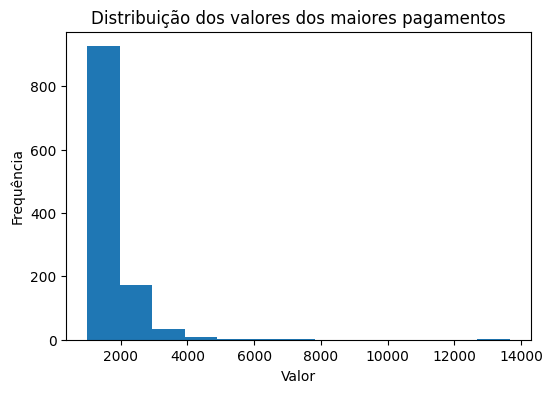

In [103]:
# Série com os valores dos maiores pagamentos, considerados aqueles maiores que $1000.
payments_gt_1000 = order_payments[order_payments['payment_value'] > 1000]
payments_gt_1000['payment_value'].plot(
    kind='hist',
    figsize=(6,4),
    xlabel='Valor',
    ylabel='Frequência',
    title='Distribuição dos valores dos maiores pagamentos',
    bins=13)

In [104]:
payments_gt_1000['payment_type'].value_counts(True)*100

payment_type
credit_card    82.086957
boleto         15.478261
debit_card      1.304348
voucher         1.130435
Name: proportion, dtype: float64

Aproximadamente 82\% dos pagamentos acima de $1000 foram feitos com cartão de crédito.

Percentual ligeiramente maior que os 74\% dos pagamentos feitos com cartão de crédito, obtido quando consideramos todas as compras.

In [105]:
payments_gt_1000[payments_gt_1000['payment_type'] == 'credit_card']['payment_installments'].value_counts(True).head(5)*100

payment_installments
10    47.987288
8     15.889831
1      7.733051
6      6.461864
5      5.720339
Name: proportion, dtype: float64

Dentre os maiores pagamentos realizados com cartão de crédito, aproximadamente 48\% foram parcelados em 10 vezes e 16\% em oito vezes, o que permite concluir que nós, brasileiros, adoramos parcelar no cartão, a perder de vista!!! 

### **2 - Quais tipos de pagamento permitem o parcelamento?**


O parcelamento só é possível com cartão de crédito. Os demais tipos de pagamento têm somente 1 parcela.


In [106]:
order_payments[order_payments['payment_installments'] != 1 ].value_counts([order_payments['payment_type'], order_payments['payment_installments']]).sort_index()

payment_type  payment_installments
credit_card   0                           2
              2                       12413
              3                       10461
              4                        7098
              5                        5239
              6                        3920
              7                        1626
              8                        4268
              9                         644
              10                       5328
              11                         23
              12                        133
              13                         16
              14                         15
              15                         74
              16                          5
              17                          8
              18                         27
              20                         17
              21                          3
              22                          1
              23                         

Nas compras com cartão de crédito, as compras à vista representam 33% do total, seguidas pelas compras parceladas em 2 vezes, correspondentes a 16%.


In [107]:
order_payments[order_payments['payment_type'] == 'credit_card'].value_counts(order_payments['payment_installments'], True).head(10)*100

payment_installments
1     33.146689
2     16.163813
3     13.621981
4      9.242789
10     6.937952
5      6.822059
8      5.557653
6      5.104499
7      2.117325
9      0.838596
Name: proportion, dtype: float64

### **3 - Verificar se um produto foi vendido acima do preço do mercado**


Foi criado um array com a média de preço de cada produto e verificado de acordo com o preço de mercado se está acima do valor de mercado.

In [108]:
avg_price = np.array(order_items.groupby('product_id')['price'].transform('mean'))
order_items['avg_price'] = avg_price
order_items['overpriced_item'] = order_items['price'] > order_items['avg_price']
order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,avg_price,overpriced_item
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,59.233333,False
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,239.900000,False
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,199.000000,False
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,12.990000,False
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,202.400000,False
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,21.900000,False
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,18.566667,True
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,810.000000,False
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,145.950000,False
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,53.990000,False


### **4 - Categorizar vendedores entre Iniciante, Intermediário, Avançado e Mestre**


Foi categorizado cada vendedor de acordo com a quantidade de vendas realizadas. O critério foi definido heuristicamente.

<Axes: title={'center': 'Nível dos vendedores na plataforma'}, xlabel='Numero de vendedores', ylabel='Níveis'>

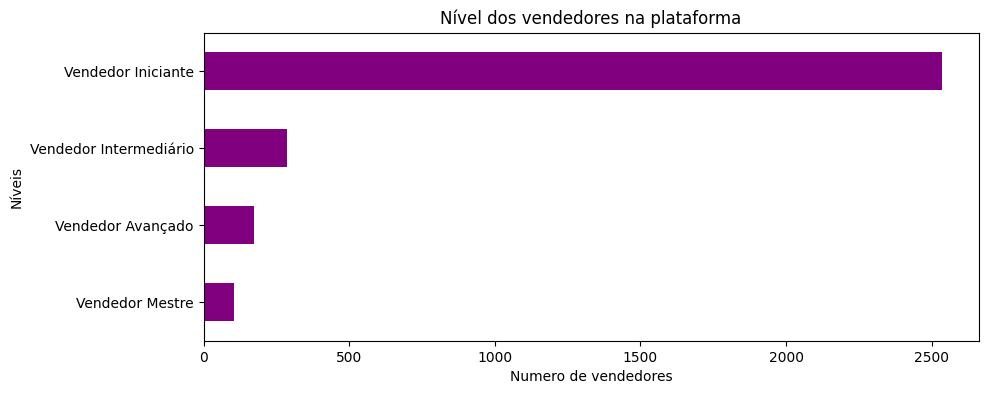

In [109]:
numero_de_vendas = order_items.value_counts('seller_id').to_frame().rename(columns={'count' : 'sales'})
vendedores = pd.merge(sellers, numero_de_vendas, on='seller_id')

def categorias_vendedores(vendas):
    if vendas < 40:
        return 'Vendedor Iniciante'
    elif vendas < 90:
        return 'Vendedor Intermediário'
    elif vendas < 200:
        return 'Vendedor Avançado'
    else:
        return 'Vendedor Mestre'
    
vendedores['seller_level'] = vendedores['sales'].apply(categorias_vendedores)
vendedores.head(10)
vendedores['seller_level'].value_counts(ascending=True).\
                                        plot(kind='barh', 
                                             figsize=(10,4),
                                             xlabel='Numero de vendedores', 
                                             ylabel='Níveis', 
                                             color='purple',
                                             title='Nível dos vendedores na plataforma')




### **5 - Quais estados que mais faturaram ?**


Foi relacionada os vendedores com os pedidos de acordo com o id do vendedor e então, foram agrupados os estados com seus respectivos faturamentos.

<Axes: title={'center': 'Faturamento por estado'}, xlabel='Faturamento (em milhares)', ylabel='Estados'>

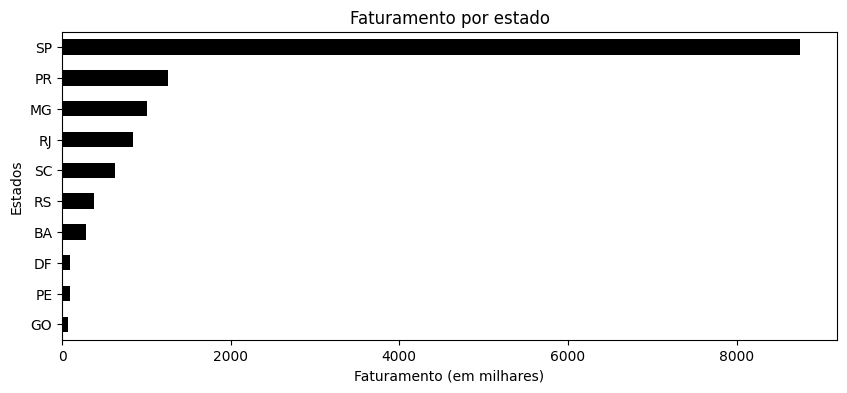

In [110]:
vendedores_com_vendas = pd.merge(order_items, sellers, on='seller_id')
faturamento_estados = vendedores_com_vendas.groupby('seller_state')['price'].sum()
faturamento_estados_milhar = faturamento_estados/1000
faturamento_estados_milhar.sort_values().tail(10).\
plot(
    kind='barh', figsize=(10,4), xlabel='Faturamento (em milhares)', ylabel='Estados', color='black',
    title='Faturamento por estado'
    )

### **6 - Quais estados faturam menos que a média?**



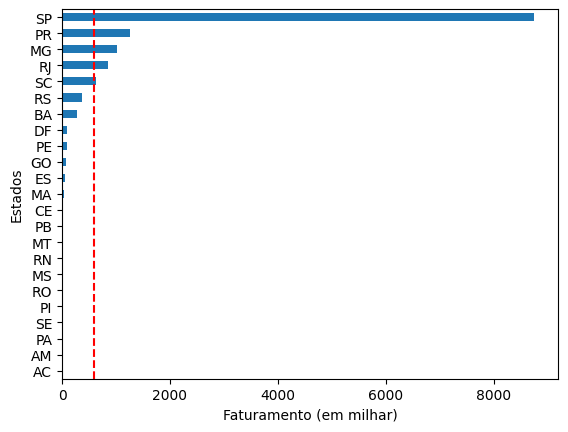

In [111]:
faturamento_estados_milhar < np.mean(vendedores_com_vendas.groupby('seller_state')['price'].sum())
media_estados = np.mean(vendedores_com_vendas.groupby('seller_state')['price'].sum())
grafico_faturamento = faturamento_estados_milhar.sort_values().plot(kind='barh', ylabel='Estados',xlabel='Faturamento (em milhar)')
grafico_faturamento.axvline(media_estados/1000, color='r',linestyle = 'dashed')


### **7 - Quais produtos têm avaliação boa e ruim?**


Primeiro, criaremos nova coluna para categorizar a pontução do review como:
- True, se pontuação for boa (maior que 3);
- False, se pontuação for ruim (menor ou igual a 3).



In [112]:
score_gt_3 = np.array(order_review['review_score'] > 3)
order_review['Produto bom'] = score_gt_3 
order_review['Produto bom'].value_counts(True)*100

Produto bom
True     77.068048
False    22.931952
Name: proportion, dtype: float64

77% dos produtos foram avaliados positivamente nas avaliações.

### **8 - Quais palavras mais usadas nos comentários com avaliações boas e ruins?**


Usaremos o recurso de word clouds para avaliar as palavras mais citadas nos comentários de avaliações boas e ruins. Para produzirmos word clouds com maior valor informativo, podemos remover as stop words, que são palavras comumente utilizadas em um idioma que carregam pouca informação analítica, como artigos (o, a, um), conjunções (e, mas, ou), pronomes (ela, dele), etc.

C:\Users\Fabiane\AppData\Local\Temp\ipykernel_6824\2844797282.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  good_scores = not_null_comments[order_review['Produto bom'] == True]
C:\Users\Fabiane\AppData\Local\Temp\ipykernel_6824\2844797282.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bad_scores = not_null_comments[order_review['Produto bom'] == False]
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabiane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


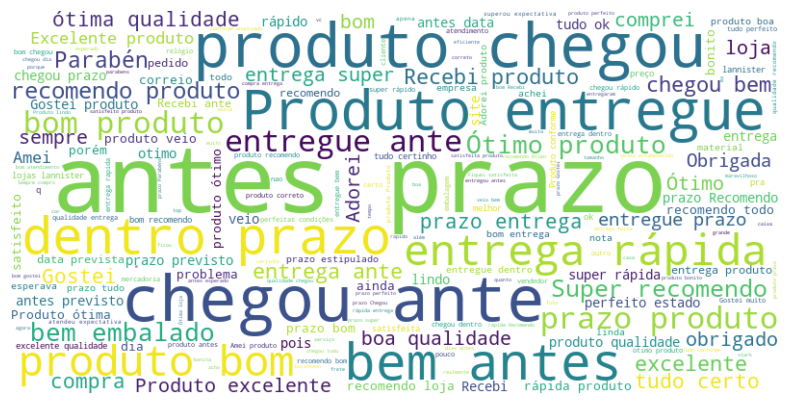

In [113]:
# Removendo comentários com valores faltantes
not_null_comments = order_review.dropna(subset=['review_comment_message'])
# Filtrando comentários de acordo com coluna "score maior que 3"
good_scores = not_null_comments[order_review['Produto bom'] == True]
bad_scores = not_null_comments[order_review['Produto bom'] == False]
# Importando stopwords da biblioteca nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))
# Concatenando strings de comentários dos DataFrames em uma única string, para cada categoria
good_comments = good_scores['review_comment_message'].str.cat(sep=' ')
bad_comments = bad_scores['review_comment_message'].str.cat(sep=' ')
# Removendo stop words
good_comments_no_stop = ' '.join(word for word in good_comments.split() if word.lower() not in stop_words)
bad_comments_no_stop = ' '.join(word for word in bad_comments.split() if word.lower() not in stop_words)
# Word cloud de comentários de produtos com boa avaliação
wordcloud_good = WordCloud(width=800, height=400, background_color='white').generate(good_comments_no_stop)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.axis('off')
plt.show()

Percebe-se que muitas das palavras mais utilizadas nos comentários de boas avaliações faz referência à entrega satisfatória (ex. prazo, antes, entregue, chegou, recebi, rápido) e à qualidade do produto (ex. excelente, ótima, bom, qualidade, adorei, recomendo).

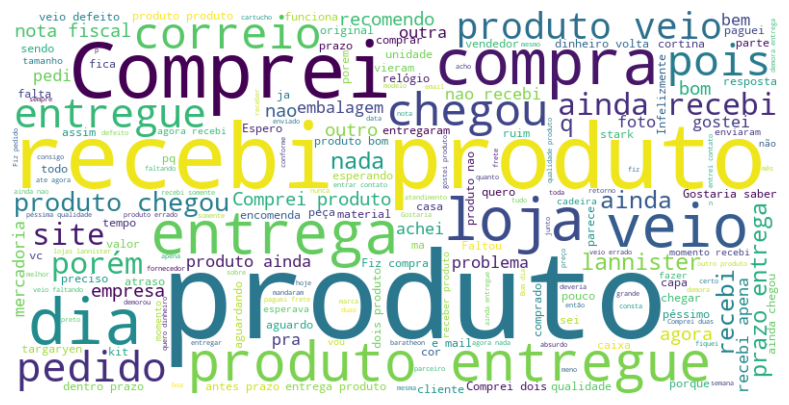

In [114]:
# Word cloud de comentários de produtos com avaliação ruim
wordcloud_bad = WordCloud(width=800, height=400, background_color='white').generate(bad_comments_no_stop)
plt.figure(figsize=(15, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.axis('off')
plt.show()

De forma similar, muitas das palavras mais frequentes dos comentários negativos referencia a entrega (ex. entregue, recebi, prazo, chegou, correio, atraso, veio errado), mas ainda temos palavras que revelam possíveis problemas relacionados ao pagamento (ex. nota fiscal, preço, compra, paguei), à qualidade do produto (ex. defeito, faltou, qualidade), ou reclamações gerais (ex. não veio, nada, aguardando, péssimo, ruim, problema).

### **9 - Quais as categorias de produtos mais reclamações dos cliente?**


Buscaremos analisar a distribuição de notas boas e ruins nas categorias com maior quantidade de produtos. Para isso, precisamos de informações presentes nos datasets:
- olist_order_items: order_id e product_id;
- olist_products: product_id e product_category_name;
- olist_order_reviews: order_id e score_gt_3.

Uniremos esses datasets através de um outer merge.

In [115]:
# Unindo olist_order_items e olist_order_reviews pelo order_id
orders_reviews = order_items.merge(order_review,on=['order_id'])
# Unindo merge anterior com olist_products pelo product_id
orders_reviews_products = orders_reviews.merge(products,on=['product_id'])
# Criando merge final somente com colunas necessárias à análise e sem nulos
selected_columns = ['order_id', 'product_id', 'product_category_name', 'review_score', 'Produto bom']
final_merge = orders_reviews_products[selected_columns].dropna()
final_merge.head()


,order_id,product_id,product_category_name,review_score,Produto bom
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,5,True
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,4,True
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,5,True
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria,4,True
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,5,True


In [116]:
dic_bad_categories = dict()
top_10_categories = final_merge['product_category_name'].value_counts()
#print('Distribuição de avaliações boas e ruins por categoria:\n')
for category, count in top_10_categories.items():
    condition_good = (final_merge['product_category_name'] == category) & (final_merge['Produto bom'] == True)
    condition_bad = (final_merge['product_category_name'] == category) & (final_merge['Produto bom'] == False)
    bad_percentual = final_merge[condition_good].shape[0]/count*100
    dic_bad_categories[category] = bad_percentual
bad_categories = pd.Series(dic_bad_categories)

print('As categorias com menores avaliações são: \n',
      bad_categories.sort_values(ascending=True).head(10))

    # print(category)
    # print(f'Avaliações boas: {final_merge[condition_good].shape[0]/count*100:.2f}%\nAvaliações ruins: {final_merge[condition_bad].shape[0]/count*100:.2f}%')
    # print('-'*32)

As categorias com menores avaliações são: 
 fraldas_higiene                                  46.153846
portateis_cozinha_e_preparadores_de_alimentos    46.666667
seguros_e_servicos                               50.000000
moveis_escritorio                                59.691761
casa_conforto_2                                  62.962963
artigos_de_festas                                65.116279
fashion_roupa_masculina                          66.412214
pc_gamer                                         66.666667
casa_conforto                                    66.896552
telefonia_fixa                                   67.175573
dtype: float64


### **10 -  Qual o volume de cada produto em litros?**


In [117]:
# O produto das dimensões em cm resulta no volume em cm3. Sendo 1 l = 1 dm3, basta dividir o resultado por 1000 para obter
# o volume em litros.
length = np.array(products['product_length_cm'])
width = np.array(products['product_width_cm'])
height = np.array(products['product_height_cm'])
volume = length * width * height / 1000
type(volume)

numpy.ndarray

In [118]:
products['volume_l'] = volume
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_l
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2.240
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10.800
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2.430
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2.704
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4.420


### **11 -  Como se distribuem os consumidores por estado?**


10 estados com mais consumidores
Média de consumidores:  3683.0


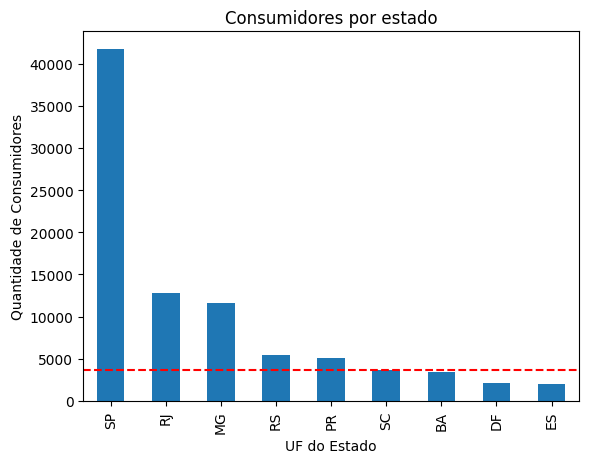

In [119]:
print("10 estados com mais consumidores")
states_customers = customer['customer_state'].value_counts()
mean_customers = states_customers.mean()
print("Média de consumidores: ", mean_customers)
states_customers_graphic = states_customers[:9].plot(kind='bar',xlabel="UF do Estado", ylabel="Quantidade de Consumidores", title="Consumidores por estado")
states_customers_graphic.axhline(mean_customers, color = 'r', linestyle = 'dashed', label = 'Média')

---*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*------*---
10 cidades com mais consumidores
Média de consumidores 24.14202476329206
customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
campinas           1444
porto alegre       1379
salvador           1245
guarulhos          1189
Name: count, dtype: int64


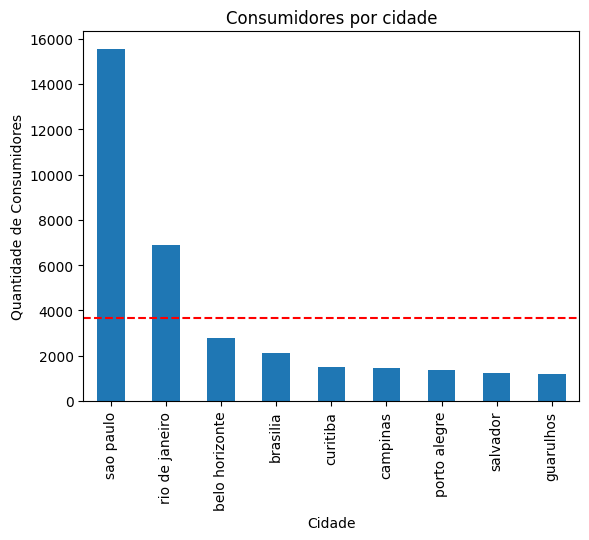

In [120]:
print('---*---' * 25)
print("10 cidades com mais consumidores")
city_customers = customer['customer_city'].value_counts()
mean_customers_city = city_customers.mean()
print("Média de consumidores" , mean_customers_city)
print(city_customers[:9])
states_customers_graphic = city_customers[:9].plot(kind='bar',xlabel="Cidade", ylabel="Quantidade de Consumidores", title="Consumidores por cidade")
states_customers_graphic.axhline(mean_customers, color = 'r', linestyle = 'dashed', label = 'Média')

### **12 -  Como se distribuem os consumidores por estado que fizeram mais compras?**


Quantos consumidores fizeram mais de uma compra? 2997
Média de quem comprou mais de uma vez:  2.116116116116116


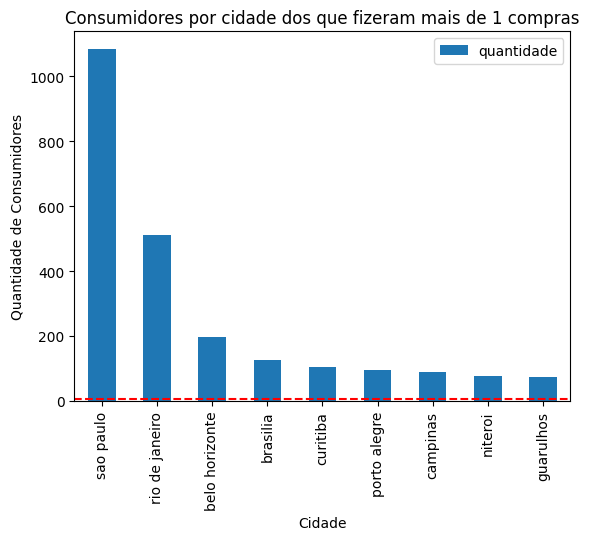

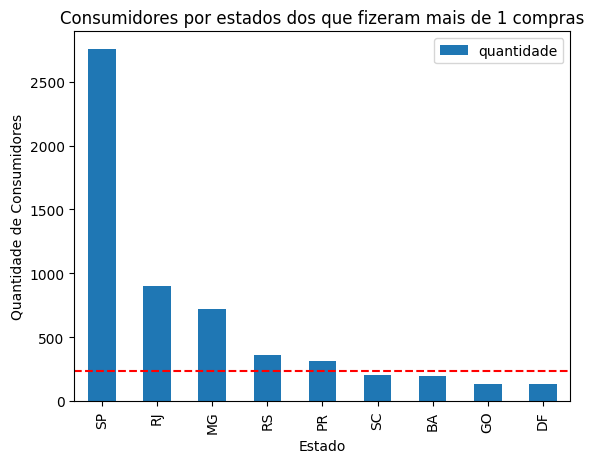

In [121]:
count_customers = customer['customer_unique_id'].value_counts()
mask_customer_more1order = count_customers > 1
print("Quantos consumidores fizeram mais de uma compra?", mask_customer_more1order.sum())
print("Média de quem comprou mais de uma vez: ", count_customers[mask_customer_more1order].mean())
ids_customer_more1order = mask_customer_more1order[mask_customer_more1order == True].index
database_customer_more1order = customer[customer['customer_unique_id'].isin(ids_customer_more1order)]
city_customers_more1order = database_customer_more1order['customer_city'].value_counts().to_frame('quantidade')
state_customers_more1order = database_customer_more1order['customer_state'].value_counts().to_frame('quantidade')
graphic_more1order_city = city_customers_more1order[:9].plot(kind='bar',xlabel="Cidade", ylabel="Quantidade de Consumidores", title="Consumidores por cidade dos que fizeram mais de 1 compras")
mean_more1order = city_customers_more1order['quantidade'].mean()
graphic_more1order_city.axhline(mean_more1order, color = 'r', linestyle = 'dashed')

# fig, axes = plt.subplots(nrows=1, ncols=2)\n",

# print(city_customers_more1order.index[0:818])\n",
# axes[0].bar(city_customers_more1order.index, city_customers_more1order['quantidade'], 'r')\n",
# axes[0].set_title('Gráfico 1')\n",

# axes[1].bar(city_customers_more1order.index, city_customers_more1order['quantidade'], 'b')\n",
# axes[1].set_title('Gráfico 2')\n",
    
graphic_more1order_state = state_customers_more1order[:9].plot(kind='bar',xlabel="Estado", ylabel="Quantidade de Consumidores", title="Consumidores por estados dos que fizeram mais de 1 compras")
mean_more1order = state_customers_more1order['quantidade'].mean()
graphic_more1order_state.axhline(mean_more1order, color = 'r', linestyle = 'dashed', label = 'Média')